### データ前処理 応用

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
import os

DATA_DIR = '/content/drive/MyDrive/project/ML/kai/longterm/data/preprocessing'

In [3]:
df = pd.read_csv(os.path.join(DATA_DIR, 'car_price.csv'))
df.head(3)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0


In [4]:
df.shape

(205, 26)

In [5]:
df.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [6]:
df.shape

(205, 26)

In [7]:
df = df.dropna(subset=['price', 'horsepower', 'peak-rpm'])

In [8]:
df.shape

(199, 26)

In [9]:
df = df.drop(labels='normalized-losses', axis=1)

In [10]:
df.shape

(199, 25)

In [11]:
df.head(3)

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0


In [12]:
df.isnull().sum()

symboling            0
make                 0
fuel-type            0
aspiration           0
num-of-doors         2
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 4
stroke               4
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [13]:
df['bore'].describe()

count    195.000000
mean       3.329385
std        0.271866
min        2.540000
25%        3.150000
50%        3.310000
75%        3.590000
max        3.940000
Name: bore, dtype: float64

(array([ 1.,  1.,  8., 35., 39., 24., 25., 42., 17.,  3.]),
 array([2.54, 2.68, 2.82, 2.96, 3.1 , 3.24, 3.38, 3.52, 3.66, 3.8 , 3.94]),
 <a list of 10 Patch objects>)

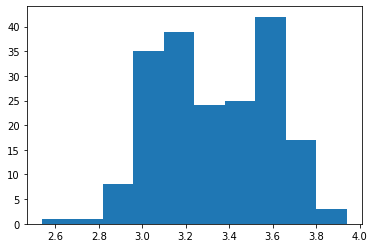

In [14]:
plt.hist(df['bore'])

In [15]:
df['stroke'].describe()

count    195.000000
mean       3.250308
std        0.314115
min        2.070000
25%        3.110000
50%        3.290000
75%        3.410000
max        4.170000
Name: stroke, dtype: float64

(array([ 3.,  1., 13.,  7., 27., 52., 70., 15.,  5.,  2.]),
 array([2.07, 2.28, 2.49, 2.7 , 2.91, 3.12, 3.33, 3.54, 3.75, 3.96, 4.17]),
 <a list of 10 Patch objects>)

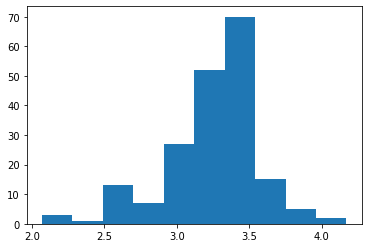

In [16]:
plt.hist(df['stroke'].dropna())

In [17]:
df = df.fillna({'bore': df['bore'].mean(), 'stroke': df['stroke'].mean()})

In [18]:
df.isnull().sum()

symboling            0
make                 0
fuel-type            0
aspiration           0
num-of-doors         2
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [19]:
df['num-of-doors'].unique()

array(['two', 'four', nan], dtype=object)

In [20]:
df['num-of-doors'].mode()[0]

'four'

In [21]:
df = df.fillna({'num-of-doors': df['num-of-doors'].mode()[0]})

In [22]:
df.isnull().sum()

symboling            0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [23]:
df_obj = df.select_dtypes(include='object')
df_obj.head(3)

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi


In [24]:
df_uni = df_obj.nunique()
df_uni

make                21
fuel-type            2
aspiration           2
num-of-doors         2
body-style           5
drive-wheels         3
engine-location      2
engine-type          6
num-of-cylinders     7
fuel-system          8
dtype: int64

In [25]:
df_cols = df_uni[df_uni == 2].index
df_cols

Index(['fuel-type', 'aspiration', 'num-of-doors', 'engine-location'], dtype='object')

In [27]:
from sklearn.preprocessing import LabelEncoder

for col in df_cols:
    le = LabelEncoder()
    le.fit(df[col])
    df[col] = le.transform(df[col])

In [28]:
df[df_cols].head(2)

,fuel-type,aspiration,num-of-doors,engine-location
0,1,0,1,0
1,1,0,1,0


In [29]:
df.shape

(199, 25)

In [30]:
df = pd.get_dummies(df, drop_first=True)

In [31]:
df.head(3)

,symboling,fuel-type,aspiration,num-of-doors,engine-location,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,make_mercury,make_mitsubishi,make_nissan,make_peugot,make_plymouth,make_porsche,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,drive-wheels_fwd,drive-wheels_rwd,engine-type_l,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,engine-type_rotor,num-of-cylinders_five,num-of-cylinders_four,num-of-cylinders_six,num-of-cylinders_three,num-of-cylinders_twelve,num-of-cylinders_two,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,3,1,0,1,0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,3,1,0,1,0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,1,1,0,1,0,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0


In [32]:
df.shape

(199, 63)

In [34]:
t = df['price'].values
x = df.drop(['price'], axis=1).values

In [35]:
from sklearn.model_selection import train_test_split

x_train, x_test, t_train, t_test = train_test_split(x, t, test_size=0.3, random_state=1)

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
model = LinearRegression()
model.fit(x_train, t_train)

print('train score:', model.score(x_train, t_train))
print('test score:', model.score(x_test, t_test))

train score: 0.9734120796250461
test score: 0.86178051659292


### 精度向上のための前処理

In [39]:
class_3 = ['audi', 'bmw', 'jaguar', 'mercedes-benz', 'porsche']
class_2 = ['alfa-romero', 'chevrolet',  'mercury', 'volvo', 'toyota', 'plymouth', 'dodge']
class_1 = ['honda', 'isuzu', 'mazda', 'mitsubishi', 'nissan', 'peugot', 'saab', 'subaru', 'volkswagen']

maker_class = []
for i in df_obj['make']:
    if i in class_3:
        maker_class.append(3)
    elif i in class_2:
        maker_class.append(2)
    elif i in class_1:
        maker_class.append(1)

In [40]:
maker_class[:10]

[2, 2, 2, 3, 3, 3, 3, 3, 3, 3]

In [41]:
df_obj['make'][:10]

0     alfa-romero
1     alfa-romero
2     alfa-romero
3            audi
4            audi
5            audi
6            audi
7            audi
8            audi
10            bmw
Name: make, dtype: object

In [42]:
df2 = df.copy()

In [43]:
df2['maker_class'] = maker_class

In [44]:
df2.head()

,symboling,fuel-type,aspiration,num-of-doors,engine-location,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,make_mercury,make_mitsubishi,make_nissan,make_peugot,make_plymouth,make_porsche,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,drive-wheels_fwd,drive-wheels_rwd,engine-type_l,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,engine-type_rotor,num-of-cylinders_five,num-of-cylinders_four,num-of-cylinders_six,num-of-cylinders_three,num-of-cylinders_twelve,num-of-cylinders_two,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi,maker_class
0,3,1,0,1,0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,2
1,3,1,0,1,0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,2
2,1,1,0,1,0,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,2
3,2,1,0,0,0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,3
4,2,1,0,0,0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,3


In [45]:
# Case by df2
t = df2['price'].values
x = df2.drop(['price'], axis=1).values

x_train, x_test, t_train, t_test = train_test_split(x, t, test_size=0.3, random_state=1)

model = LinearRegression()
model.fit(x_train, t_train)

print('train score:', model.score(x_train, t_train))
print('test score:', model.score(x_test, t_test))

train score: 0.9734120796250461
test score: 0.8620181200018049


#### 外れ値除去

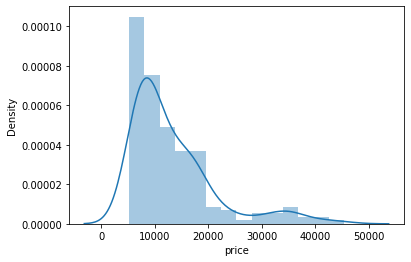

In [46]:
sns.distplot(df['price'])

In [47]:
mu = df['price'].mean()
sigma = df['price'].std()
print(mu, sigma)

13243.43216080402 7978.707608706005


In [48]:
df3 = df[(mu - 3 * sigma < df['price']) & (df['price'] < mu + 3 * sigma)]

In [49]:
df.shape

(199, 63)

In [50]:
df3.shape

(196, 63)

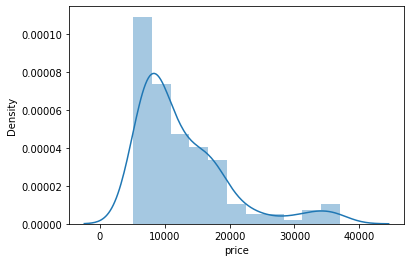

In [51]:
sns.distplot(df3['price'])

In [52]:
median = df['price'].median()
median

10345.0

In [53]:
MAD = 1.4826 * np.median(abs(df['price'] - median))
MAD

4975.6056

In [54]:
df4 = df[(median - 3 * MAD < df['price']) & (df['price'] < median + 3 * MAD)]

In [55]:
df4.shape

(182, 63)

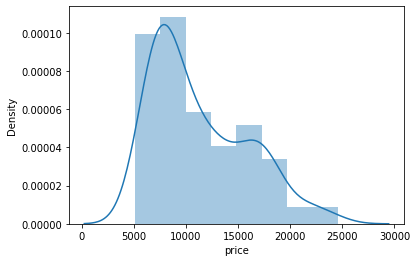

In [56]:
sns.distplot(df4['price'])

In [57]:
# Case by df3
t = df3['price'].values
x = df3.drop(['price'], axis=1).values

x_train, x_test, t_train, t_test = train_test_split(x, t, test_size=0.3, random_state=1)

model = LinearRegression()
model.fit(x_train, t_train)

print('train score:', model.score(x_train, t_train))
print('test score:', model.score(x_test, t_test))

train score: 0.9776827981599897
test score: 0.9197669248900593


In [58]:
# Case by df4
t = df4['price'].values
x = df4.drop(['price'], axis=1).values

x_train, x_test, t_train, t_test = train_test_split(x, t, test_size=0.3, random_state=1)

model = LinearRegression()
model.fit(x_train, t_train)

print('train score:', model.score(x_train, t_train))
print('test score:', model.score(x_test, t_test))

train score: 0.961116627981775
test score: 0.7168256339604309
